In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [43]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

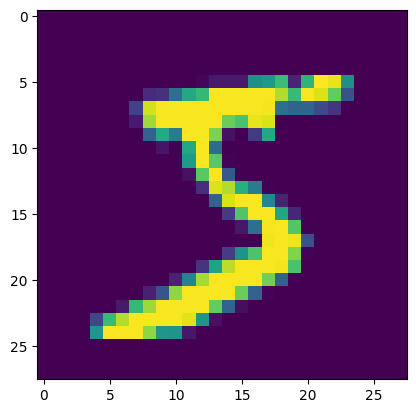

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
X_train=X_train/255
y_train=y_train/255

In [33]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [45]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 55.0520 - val_loss: 2.8349
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.4988 - val_loss: 2.1280
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.8954 - val_loss: 1.9020
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3706 - val_loss: 1.6627
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1193 - val_loss: 1.0592
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8582 - val_loss: 1.0362
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6238 - val_loss: 0.7462
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4521 - val_loss: 0.5859
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3157 - val_loss: 0.4111
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.29

In [46]:
y_prob=model.predict(X_test)

  1/313 [..............................] - ETA: 5s

313/313 [==============================] - 0s 1ms/step


In [47]:
y_pred=y_prob.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9321

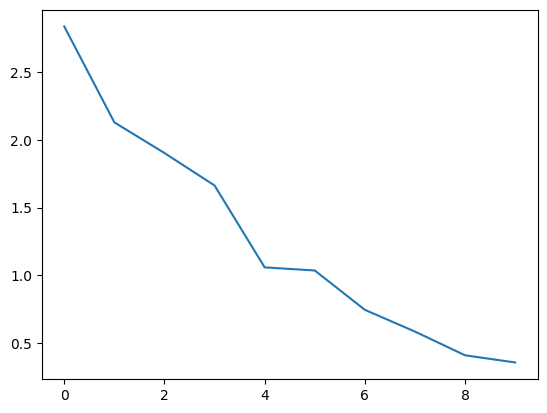

In [51]:
plt.plot(history.history['val_loss'])